<a href="https://colab.research.google.com/github/paolominguzzi/AI_Supply_Chain/blob/master/FFX_AI_Models_Todos_Los_Productos(Frutas)_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
!pip install numpy
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
!pip install Prophet
from prophet import Prophet
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from xgboost import XGBRegressor

In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving series-históricas-de-frutas-y-hortalizas_mensual_Todos_LosProductosv2.xlsx to series-históricas-de-frutas-y-hortalizas_mensual_Todos_LosProductosv2.xlsx


In [ ]:
data_files = {}
for filename in uploaded.keys():
    data_files[filename] = pd.read_excel(filename)

In [ ]:
for key in data_files:
    print(f"Displaying data from {key}:")
    print(data_files[key].head())

Displaying data from series-históricas-de-frutas-y-hortalizas_mensual_Todos_LosProductosv2.xlsx:
     Fecha                           Mercado Producto  Variedad / Tipo  \
0  07/2021  Agrícola del Norte S.A. de Arica  Plátano  Sin especificar   
1  07/2021  Agrícola del Norte S.A. de Arica      Ajo            Chino   
2  07/2021  Agrícola del Norte S.A. de Arica     Piña         Caramelo   
3  07/2021  Agrícola del Norte S.A. de Arica     Piña         Caramelo   
4  07/2021  Agrícola del Norte S.A. de Arica     Piña         Caramelo   

    Calidad Procedencia  Volumen  Precio mínimo  Precio máximo  \
0    Pintón     Bolivia    150.0   12806.624340   13873.842992   
1   Primera       China    400.0   14941.061645   16008.280424   
2  Especial     Ecuador    400.0   19209.936509   21344.373815   
3   Primera     Ecuador    520.0   19209.936509   21344.373815   
4   Segunda     Ecuador    540.0   19209.936509   21344.373815   

   Precio promedio Unidad de comercialización  
0     13162.

In [ ]:
# Step 4: Preprocessing the data
# Combine the data from different markets if necessary, or process them separately
limon_data = data_files['series-históricas-de-frutas-y-hortalizas_mensual_Todos_LosProductosv2.xlsx']
limon_data.head()


,Fecha,Mercado,Producto,Variedad / Tipo,Calidad,Procedencia,Volumen,Precio mínimo,Precio máximo,Precio promedio,Unidad de comercialización
0,07/2021,Agrícola del Norte S.A. de Arica,Plátano,Sin especificar,Pintón,Bolivia,150.0,12806.624340,13873.842992,13162.363848,$/caja 20 kilos
1,07/2021,Agrícola del Norte S.A. de Arica,Ajo,Chino,Primera,China,400.0,14941.061645,16008.280424,15474.671035,$/caja 10 kilos
2,07/2021,Agrícola del Norte S.A. de Arica,Piña,Caramelo,Especial,Ecuador,400.0,19209.936509,21344.373815,20277.155162,$/caja 10 unidades
3,07/2021,Agrícola del Norte S.A. de Arica,Piña,Caramelo,Primera,Ecuador,520.0,19209.936509,21344.373815,20256.631612,$/caja 12 unidades
4,07/2021,Agrícola del Norte S.A. de Arica,Piña,Caramelo,Segunda,Ecuador,540.0,19209.936509,21344.373815,20277.155162,$/caja 14 unidades


In [ ]:
# Assuming 'Fecha', 'Volumen', and 'Precio promedio ponderado' are the columns we're interested in
# Adjust the column names as per your data
for key, df in data_files.items():
    # Attempt to convert 'Fecha' column to datetime, handling errors
    try:
        df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce') # 'coerce' will set invalid parsing as NaT (Not a Time)
    except KeyError:
        print(f"Column 'Fecha' not found in {key}. Skipping...")
        continue  # Skip to next file if 'Fecha' column is missing

    df = df.dropna(subset=['Fecha']) # Drop rows where 'Fecha' is NaT
    df = df.sort_values('Fecha')
    data_files[key] = df # Update the DataFrame in the dictionary


<ipython-input-14-3fe7480e802d>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce') # 'coerce' will set invalid parsing as NaT (Not a Time)


In [ ]:
for key, df in data_files.items():
    df['Fecha'] = pd.to_datetime(df['Fecha'])
    df = df.sort_values('Fecha')

In [ ]:
# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))

# Iterate over the data files and scale relevant columns
for key, df in data_files.items():
    # Check if the required columns exist in the current DataFrame
    if 'Volumen' in df.columns and 'Precio promedio ponderado' in df.columns:
        df[['Volumen', 'Precio promedio ponderado']] = scaler.fit_transform(df[['Volumen', 'Precio promedio ponderado']])
    else:
        print(f"Skipping scaling for {key} due to missing columns.")

Skipping scaling for series-históricas-de-frutas-y-hortalizas_mensual_Todos_LosProductosv2.xlsx due to missing columns.


In [ ]:
# Save the preprocessed data
data_files[key] = df

In [ ]:
# Example of showing processed data
data_files['series-históricas-de-frutas-y-hortalizas_mensual_Todos_LosProductosv2.xlsx'].head()

,Fecha,Mercado,Producto,Variedad / Tipo,Calidad,Procedencia,Volumen,Precio mínimo,Precio máximo,Precio promedio,Unidad de comercialización
0,2021-07-01,Agrícola del Norte S.A. de Arica,Plátano,Sin especificar,Pintón,Bolivia,150.0,12806.624340,13873.842992,13162.363848,$/caja 20 kilos
1760,2021-07-01,Vega Central Mapocho de Santiago,Mandarina,Clemenuless,Especial,Provincia de Limarí,40.0,6403.312170,6403.312170,6403.312170,$/bandeja 10 kilos
1761,2021-07-01,Vega Central Mapocho de Santiago,Mandarina,Clemenuless,Primera,Provincia de Limarí,100.0,5336.093390,5336.093390,5336.093390,$/bandeja 10 kilos
1762,2021-07-01,Vega Central Mapocho de Santiago,Mandarina,Clemenuless,Segunda,Provincia de Limarí,80.0,4268.874738,4268.874738,4268.874738,$/bandeja 10 kilos
1763,2021-07-01,Vega Central Mapocho de Santiago,Mandarina,Clemenuless,Tercera,Provincia de Limarí,60.0,3201.656085,3201.656085,3201.656085,$/bandeja 10 kilos


In [ ]:
import numpy as np  # Import NumPy

#Split Data into Training and Testing Sets
train_size = 0.8

# Example: Process one of the datasets (e.g., 'Limon')
df = data_files['series-históricas-de-frutas-y-hortalizas_mensual_Todos_LosProductosv2.xlsx']

train_size = int(len(df) * train_size)
train, test = df[:train_size], df[train_size:]

# Prepare data for LSTM model
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y) # Now you can use np.array()

time_step = 10
X_train, y_train = create_dataset(train[['Volumen']].values, time_step)
X_test, y_test = create_dataset(test[['Volumen']].values, time_step)

# Reshape for LSTM input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
#Train the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=1, epochs=1)

# Predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Reshape predictions to 2D arrays for inverse_transform
train_predict = train_predict.reshape(-1, 1)
test_predict = test_predict.reshape(-1, 1)

# Fit scaler to training data and then inverse transform
scaler.fit(y_train.reshape(-1, 1))  # Fit the scaler to the training targets
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


82219/82219 ━━━━━━━━━━━━━━━━━━━━ 635s 8ms/step - loss: 3782511360.0000
2570/2570 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step
643/643 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

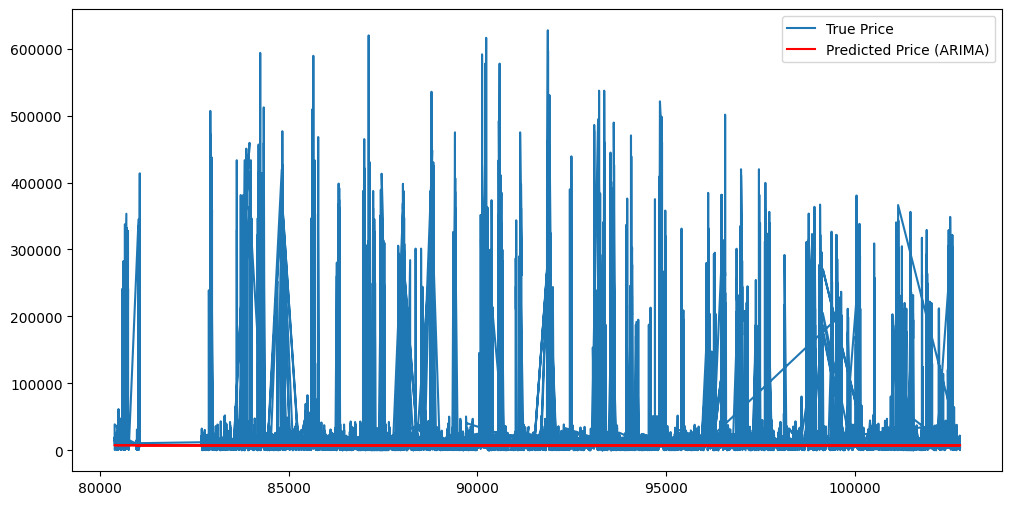

In [ ]:
# ARIMA model for price prediction
arima_model = ARIMA(train['Precio promedio'], order=(5,1,0))
arima_model_fit = arima_model.fit()
arima_predictions = arima_model_fit.forecast(steps=len(test))

# Plot ARIMA predictions
plt.figure(figsize=(12, 6))
plt.plot(test.index, test['Precio promedio'], label='True Price')
plt.plot(test.index, arima_predictions, label='Predicted Price (ARIMA)', color='red')
plt.legend()
plt.show()


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpiz1wo2r1/5o9ue2cv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpiz1wo2r1/1a5f_3sn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47915', 'data', 'file=/tmp/tmpiz1wo2r1/5o9ue2cv.json', 'init=/tmp/tmpiz1wo2r1/1a5f_3sn.json', 'output', 'file=/tmp/tmpiz1wo2r1/prophet_modelyg19anok/prophet_model-20240901012009.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:20:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:20:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/

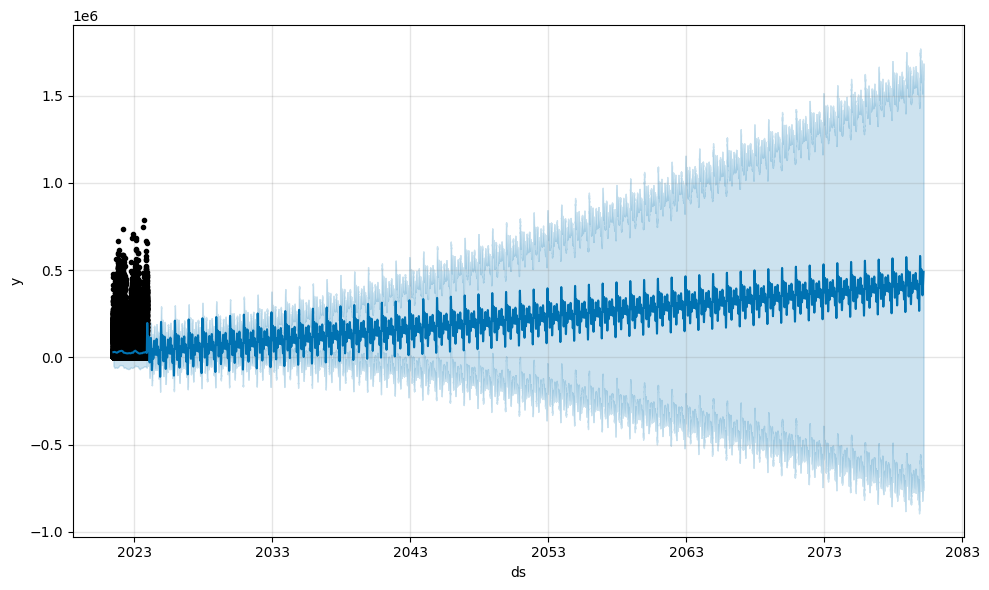

In [ ]:
# Prophet model for trend analysis
prophet_df = train[['Fecha', 'Precio promedio']].rename(columns={'Fecha': 'ds', 'Precio promedio': 'y'})
prophet_model = Prophet()
prophet_model.fit(prophet_df)

future = prophet_model.make_future_dataframe(periods=len(test))
forecast = prophet_model.predict(future)

# Plot the forecast
prophet_model.plot(forecast)
plt.show()


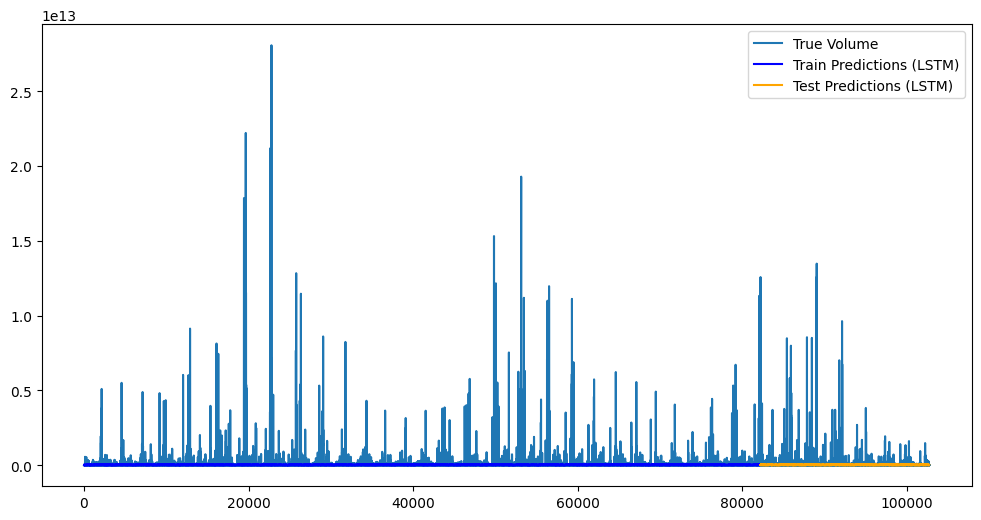

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(df['Volumen'].values.reshape(-1,1)), label='True Volume')
plt.plot(np.arange(len(train_predict)), train_predict, label='Train Predictions (LSTM)', color='blue')
plt.plot(np.arange(len(train_predict), len(train_predict)+len(test_predict)), test_predict, label='Test Predictions (LSTM)', color='orange')
plt.legend()
plt.show()
